<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DataScience_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=tomato> PYTHON PARA DATA SCIENCE - PANDAS

<a href=https://colab.research.google.com/drive/1MBadQHkdwqlB4Iq52yFkvOZYt-FkgQ7P><font color=gray size=2>Arquivo Colab</font></a>

<font color=gray size=2>Data de início: fev. de 2022</font>

---


## <font color=tomato> CONTEÚDO</font>

* PANDAS
    * Estruturas de dados no pandas
    * Seleção de dados
    * Queries
    * Iteração
    * Tratamento de dados
    * Concatenação de tabelas
    * Organização da estrutura da tabela
    * Métodos de Interpolação
    * Contadores
    * Agrupadores
    * Faixas de Valor
    * Outliers
    * Gráficos

# <font color=tomato> 1. PANDAS BÁSICO</font>
---

**versão: 0.25.2**
  
Pandas é uma ferramenta de manipulação de dados de alto nível, construída com base no pacote Numpy. O pacote pandas possui estruturas de dados bastante interessantes para manipulação de dados e por isso é muito utilizado por cientistas de dados.


## Estruturas de Dados

### Series

Series são arrays unidimensionais rotulados capazes de armazenar qualquer tipo de dado. Os rótulos das linhas são chamados de **index**. A forma básica de criação de uma Series é a seguinte:


```
    s = pd.Series(dados, index = index)
```

O argumento *dados* pode ser um dicionário, uma lista, um array Numpy ou uma constante.

### DataFrames

DataFrame é uma estrutura de dados tabular bidimensional com rótulos nas linha e colunas. Como a Series, os DataFrames são capazes de armazenar qualquer tipo de dados.


```
    df = pd.DataFrame(dados, index = index, columns = columns)
```

O argumento *dados* pode ser um dicionário, uma lista, um array Numpy, uma Series e outro DataFrame.

**Documentação:** https://pandas.pydata.org/pandas-docs/version/0.25/

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

## 1.1 Estruturas de dados

In [ ]:
import pandas as pd

### Series a partir de lista

In [ ]:
# CRIAÇÃO SIMPLES
carros = ['Jetta Variant', 'Passat', 'Crossfox']

pd.Series(carros)

0    Jetta Variant
1           Passat
2         Crossfox
dtype: object

In [ ]:
# CRIAÇÃO SIMPLES
data = list(range(1,6))

s = pd.Series(data)
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
# CRIAÇÃO COM INDEX
index = ['Linha' + str(i) for i in range(5)]
s = pd.Series(data, index=index)
s

Linha0    1
Linha1    2
Linha2    3
Linha3    4
Linha4    5
dtype: int64

In [ ]:
# CRIAÇÃO COM DICIONÁRIO
data = {'Linha' + str(i): i+1 for i in range(5)}
s = pd.Series(data)
s

Linha0    1
Linha1    2
Linha2    3
Linha3    4
Linha4    5
dtype: int64

### DataFrame com Listas

In [ ]:
data = [[1,2,3],
        [4,5,6],
        [7,8,9]]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [ ]:
[[i+(3*j) for i in range(1,4)] for j in range(3)]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [ ]:
# CRIAÇÃO DE DF SIMPLES
df = pd.DataFrame(data=data)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
# NOMEAÇÃO DE INDEX E COLUNAS
index = ['Linha'+str(i) for i in range(3)]
columns = ['Coluna'+str(i) for i in range(3)]
df = pd.DataFrame(data=data, index=index, columns=columns)

,Coluna0,Coluna1,Coluna2
Linha0,1,2,3
Linha1,4,5,6
Linha2,7,8,9


### DataFrame com Lista de Dicionários

In [ ]:
dados = [
    {'Nome': 'Jetta Variant', 'Motor': 'Motor 4.0 Turbo', 'Ano': 2003, 'Quilometragem': 44410.0, 'Zero_km': False, 'Valor': 88078.64},
    {'Nome': 'Passat', 'Motor': 'Motor Diesel', 'Ano': 1991, 'Quilometragem': 5712.0, 'Zero_km': False, 'Valor': 106161.94},
    {'Nome': 'Crossfox', 'Motor': 'Motor Diesel V8', 'Ano': 1990, 'Quilometragem': 37123.0, 'Zero_km': False, 'Valor': 72832.16}
]

In [ ]:
dataset = pd.DataFrame(dados)

In [ ]:
dataset

,Nome,Motor,Ano,Quilometragem,Zero_km,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,88078.64
1,Passat,Motor Diesel,1991,5712.0,False,106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,72832.16


In [ ]:
dataset[['Nome', 'Motor', 'Ano', 'Quilometragem', 'Zero_km', 'Valor']]

,Nome,Motor,Ano,Quilometragem,Zero_km,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,88078.64
1,Passat,Motor Diesel,1991,5712.0,False,106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,72832.16


### DataFrame com Dicionário

In [ ]:
data = {'Coluna'+str(i): {'Linha'+str(j): i+1+(3*j) for j in range(3)} for i in range(3)}
data

{'Coluna0': {'Linha0': 1, 'Linha1': 4, 'Linha2': 7},
 'Coluna1': {'Linha0': 2, 'Linha1': 5, 'Linha2': 8},
 'Coluna2': {'Linha0': 3, 'Linha1': 6, 'Linha2': 9}}

In [ ]:
pd.DataFrame(data)

,Coluna0,Coluna1,Coluna2
Linha0,1,2,3
Linha1,4,5,6
Linha2,7,8,9


In [ ]:
dados = {
    'Nome': ['Jetta Variant', 'Passat', 'Crossfox'], 
    'Motor': ['Motor 4.0 Turbo', 'Motor Diesel', 'Motor Diesel V8'],
    'Ano': [2003, 1991, 1990],
    'Quilometragem': [44410.0, 5712.0, 37123.0],
    'Zero_km': [False, False, False],
    'Valor': [88078.64, 106161.94, 72832.16]
}

In [ ]:
dataset = pd.DataFrame(dados)

In [ ]:
dataset

,Nome,Motor,Ano,Quilometragem,Zero_km,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,88078.64
1,Passat,Motor Diesel,1991,5712.0,False,106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,72832.16


In [ ]:
dados = {'Crossfox': {'km': 35000, 'ano': 2005, 'km_media': 2500.0},
 'DS5': {'km': 17000, 'ano': 2015, 'km_media': 4250.0},
 'Fusca': {'km': 130000, 'ano': 1979, 'km_media': 3250.0},
 'Jetta': {'km': 56000, 'ano': 2011, 'km_media': 7000.0},
 'Passat': {'km': 62000, 'ano': 1999, 'km_media': 3100.0}}

pd.DataFrame(dados).T

,Crossfox,DS5,Fusca,Jetta,Passat
km,35000.0,17000.0,130000.0,56000.0,62000.0
ano,2005.0,2015.0,1979.0,2011.0,1999.0
km_media,2500.0,4250.0,3250.0,7000.0,3100.0


### DataFrame com Arquivo externo

In [ ]:
dataset = pd.read_csv('db.csv', sep = ';', index_col = 0)

In [ ]:
dataset.head()

NameError: ignored

#### JSON

In [ ]:
with open('aluguel.json') as f:
    print(f.read())

[{"Tipo":"Quitinete","Bairro":"Copacabana","Quartos":1,"Vagas":0,"Suites":0,"Area":40,"Valor":1700.0,"Condominio":500.0,"IPTU":60.0},
{"Tipo":"Casa","Bairro":"Jardim Bot\u00e2nico","Quartos":2,"Vagas":0,"Suites":1,"Area":100,"Valor":7000.0,"Condominio":null,"IPTU":null},
{"Tipo":"Conjunto Comercial\/Sala","Bairro":"Barra da Tijuca","Quartos":0,"Vagas":4,"Suites":0,"Area":150,"Valor":5200.0,"Condominio":4020.0,"IPTU":1111.0},
{"Tipo":"Apartamento","Bairro":"Centro","Quartos":1,"Vagas":0,"Suites":0,"Area":15,"Valor":800.0,"Condominio":390.0,"IPTU":20.0},
{"Tipo":"Apartamento","Bairro":"Higien\u00f3polis","Quartos":1,"Vagas":0,"Suites":0,"Area":48,"Valor":800.0,"Condominio":230.0,"IPTU":null},
{"Tipo":"Apartamento","Bairro":"Vista Alegre","Quartos":3,"Vagas":1,"Suites":0,"Area":70,"Valor":1200.0,"Condominio":null,"IPTU":null},
{"Tipo":"Apartamento","Bairro":"Cachambi","Quartos":2,"Vagas":0,"Suites":0,"Area":50,"Valor":1300.0,"Condominio":301.0,"IPTU":17.0},
{"Tipo":"Casa de Condom\u00edni

In [ ]:
df_json = pd.read_json('aluguel.json')
df_json

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


#### TXT

In [ ]:
with open('aluguel.txt') as f:
    print(f.read())

# Tabulações

Tipo	Bairro	Quartos	Vagas	Suites	Area	Valor	Condominio	IPTU
Quitinete	Copacabana	1	0	0	40	1700	500	60
Casa	Jardim Botânico	2	0	1	100	7000		
Conjunto Comercial/Sala	Barra da Tijuca	0	4	0	150	5200	4020	1111
Apartamento	Centro	1	0	0	15	800	390	20
Apartamento	Higienópolis	1	0	0	48	800	230	
Apartamento	Vista Alegre	3	1	0	70	1200		
Apartamento	Cachambi	2	0	0	50	1300	301	17
Casa de Condomínio	Barra da Tijuca	5	4	5	750	22000		
Casa de Condomínio	Ramos	2	2	0	65	1000		
Conjunto Comercial/Sala	Centro	0	3	0	695	35000	19193	3030



In [ ]:
df_txt = pd.read_table('aluguel.txt')
df_txt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


#### XLS

In [ ]:
df_xls = pd.read_excel('aluguel.xlsx')
df_xls

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


#### HTML

In [ ]:
df_html = pd.read_html('/content/dados_html_1.html')  # pode usar o URL
df_html[0]

,FAIXA ETÁRIA,UNAFISCO SAÚDE SOFT II,SOFT PARTICIPATIVO,UNIQUE
0,00 A 18,"R$218,99","R$192,60","R$334,48"
1,19 A 23,"R$263,63","R$207,67","R$380,06"
2,24 A 28,"R$322,44","R$224,26","R$464,39"
3,29 A 33,"R$402,05","R$258,63","R$566,68"
4,34 A 38,"R$455,17","R$306,37","R$664,61"
5,39 A 43,"R$489,29","R$417,93","R$742,72"
6,44 A 48,"R$582,65","R$495,24","R$869,47"
7,49 A 53,"R$718,86","R$562,64","R$1.046,29"
8,54 A 58,"R$908,54","R$721,00","R$1.355,74"
9,59 OU MAIS,"R$1.244,50","R$1.151,62","R$2.003,53"


In [ ]:
df_html = pd.read_html('/content/dados_html_2.html')  # pode usar o URL

In [ ]:
len(df_html)
# Cada objeto na lista é uma tabela encontrada no HTML

3

In [ ]:
df_html[0]

Date  ...                                       Reserve balances maintained 4
                  Date  ... Balances maintained that exceed the top of the penalty- free band 6
0              Month 7  ...                                            Month 7                 
1            Apr. 2017  ...                                            2157202                 
2             May 2017  ...                                            2099222                 
3            June 2017  ...                                            2076852                 
4            July 2017  ...                                            2101027                 
5            Aug. 2017  ...                                            2212375                 
6           Sept. 2017  ...                                            2161785                 
7            Oct. 2017  ...                                            2117497                 
8            Nov. 2017  ...                                            2179474                 
9            Dec. 2017  ...                                            2108555                 
10           Jan. 2018  ...                                            2075794                 
11           Feb. 2018  ...                                            2102989                 
12           Mar. 2018  ...                                            2035232                 
13           Apr. 2018  ...                                            1947710                 
14                 NaN  ...                                                NaN                 
15  Two weeks ending 8  ...                                 Two weeks ending 8                 
16       Mar. 14, 2018  ...                                            2098542                 
17       Mar. 28, 2018  ...                                            1985086                 
18       Apr. 11, 2018  ...                                            1973798                 
19       Apr. 25, 2018  ...                                            1956249                 
20         May 9, 2018  ...                                            1866409                 

[21 rows x 7 columns]

## 1.2 Seleções com DataFrames

In [ ]:
dataset.head()

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10


### Selecionando colunas

In [ ]:
dataset['Valor']

Nome
Jetta Variant             88078.64
Passat                   106161.94
Crossfox                  72832.16
DS5                      124549.07
Aston Martin DB4          92612.10
                           ...    
Phantom 2013              51759.58
Cadillac Ciel concept     51667.06
Classe GLK                68934.03
Aston Martin DB5         122110.90
Macan                     90381.47
Name: Valor, Length: 258, dtype: float64

In [ ]:
type(dataset['Valor'])

pandas.core.series.Series

In [ ]:
dataset[['Valor']]

,Valor
Nome,
Jetta Variant,88078.64
Passat,106161.94
Crossfox,72832.16
DS5,124549.07
Aston Martin DB4,92612.10
...,...
Phantom 2013,51759.58
Cadillac Ciel concept,51667.06
Classe GLK,68934.03


In [ ]:
type(dataset[['Valor']])

pandas.core.frame.DataFrame

### Selecionando linhas - [ i : j ] 

<font color=red>**Observação:**</font> A indexação tem origem no zero e nos fatiamentos (*slices*) a linha com índice i é **incluída** e a linha com índice j **não é incluída** no resultado.

In [ ]:
dataset[0:3]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16


### Utilizando .loc para seleções

<font color=red>**Observação:**</font> Seleciona um grupo de linhas e colunas segundo os rótulos ou uma matriz booleana.

In [ ]:
dataset.loc['Passat']

Motor                                                 Motor Diesel
Ano                                                           1991
Quilometragem                                                 5712
Zero_km                                                      False
Acessórios       ['Central multimídia', 'Teto panorâmico', 'Fre...
Valor                                                       106162
Name: Passat, dtype: object

In [ ]:
dataset.loc[['Passat', 'DS5']]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07


In [ ]:
dataset.loc[['Passat', 'DS5'], ['Motor', 'Valor']]

,Motor,Valor
Nome,,
Passat,Motor Diesel,106161.94
DS5,Motor 2.4 Turbo,124549.07


In [ ]:
dataset.loc[:, ['Motor', 'Valor']]

,Motor,Valor
Nome,,
Jetta Variant,Motor 4.0 Turbo,88078.64
Passat,Motor Diesel,106161.94
Crossfox,Motor Diesel V8,72832.16
DS5,Motor 2.4 Turbo,124549.07
Aston Martin DB4,Motor 2.4 Turbo,92612.10
...,...,...
Phantom 2013,Motor V8,51759.58
Cadillac Ciel concept,Motor V8,51667.06
Classe GLK,Motor 5.0 V8 Bi-Turbo,68934.03


### Utilizando .iloc para seleções

<font color=red>**Observação:**</font> Seleciona com base nos índices, ou seja, se baseia na posição das informações.

In [ ]:
dataset.head()

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10


In [ ]:
dataset.iloc[[1]]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94


In [ ]:
dataset.iloc[1:4]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07


In [ ]:
dataset.iloc[1:4, [0, 5, 2]]

,Motor,Valor,Quilometragem
Nome,,,
Passat,Motor Diesel,106161.94,5712.0
Crossfox,Motor Diesel V8,72832.16,37123.0
DS5,Motor 2.4 Turbo,124549.07,NaN


In [ ]:
dataset.iloc[[1, 42, 22], [0, 5, 2]]

,Motor,Valor,Quilometragem
Nome,,,
Passat,Motor Diesel,106161.94,5712.0
Optima,Motor 1.8 16v,86641.34,NaN
Lamborghini Obvious,Motor Diesel V6,133529.84,98079.0


In [ ]:
dataset.iloc[:, [0, 5, 2]]

,Motor,Valor,Quilometragem
Nome,,,
Jetta Variant,Motor 4.0 Turbo,88078.64,44410.0
Passat,Motor Diesel,106161.94,5712.0
Crossfox,Motor Diesel V8,72832.16,37123.0
DS5,Motor 2.4 Turbo,124549.07,NaN
Aston Martin DB4,Motor 2.4 Turbo,92612.10,25757.0
...,...,...,...
Phantom 2013,Motor V8,51759.58,27505.0
Cadillac Ciel concept,Motor V8,51667.06,29981.0
Classe GLK,Motor 5.0 V8 Bi-Turbo,68934.03,52637.0


## 1.3 Queries com DataFrames

In [ ]:
dataset.head()

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10


In [ ]:
dataset.Motor

Nome
Jetta Variant                  Motor 4.0 Turbo
Passat                            Motor Diesel
Crossfox                       Motor Diesel V8
DS5                            Motor 2.4 Turbo
Aston Martin DB4               Motor 2.4 Turbo
                                 ...          
Phantom 2013                          Motor V8
Cadillac Ciel concept                 Motor V8
Classe GLK               Motor 5.0 V8 Bi-Turbo
Aston Martin DB5                  Motor Diesel
Macan                          Motor Diesel V6
Name: Motor, Length: 258, dtype: object

In [ ]:
select = dataset.Motor == 'Motor Diesel'

In [ ]:
type(select)

pandas.core.series.Series

In [ ]:
dataset[select]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Effa Hafei Picape Baú,Motor Diesel,1991,102959.0,False,"['Controle de estabilidade', 'Painel digital',...",125684.65
Sorento,Motor Diesel,2019,NaN,True,"['Sensor de chuva', 'Câmera de estacionamento'...",81399.35
New Fiesta Hatch,Motor Diesel,2017,118895.0,False,"['Sensor de estacionamento', 'Travas elétricas...",66007.16
Kangoo Express,Motor Diesel,2007,29132.0,False,"['Bancos de couro', 'Câmbio automático', 'Pilo...",146716.91
...,...,...,...,...,...,...
Dodge Dakota,Motor Diesel,1993,71544.0,False,"['Controle de tração', 'Sensor de estacionamen...",141083.35
i30 CW,Motor Diesel,2015,8497.0,False,"['Sensor de chuva', 'Vidros elétricos', 'Contr...",73311.75
Série 7 Sedã,Motor Diesel,2019,NaN,True,"['Vidros elétricos', 'Travas elétricas', 'Roda...",67539.79


In [ ]:
dataset[(dataset.Motor == 'Motor Diesel') & (dataset.Zero_km == True)]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Sorento,Motor Diesel,2019,NaN,True,"['Sensor de chuva', 'Câmera de estacionamento'...",81399.35
Cielo Hatch,Motor Diesel,2019,NaN,True,"['Painel digital', 'Central multimídia', 'Câme...",145197.70
Camry,Motor Diesel,2019,NaN,True,"['Travas elétricas', 'Rodas de liga', 'Sensor ...",138597.27
Aston Martin Virage,Motor Diesel,2019,NaN,True,"['Travas elétricas', 'Controle de tração', 'Câ...",97290.18
Série 7 Sedã,Motor Diesel,2019,NaN,True,"['Vidros elétricos', 'Travas elétricas', 'Roda...",67539.79


In [ ]:
(dataset.Motor == 'Motor Diesel') & (dataset.Zero_km == True)

Nome
Jetta Variant            False
Passat                   False
Crossfox                 False
DS5                      False
Aston Martin DB4         False
                         ...  
Phantom 2013             False
Cadillac Ciel concept    False
Classe GLK               False
Aston Martin DB5         False
Macan                    False
Length: 258, dtype: bool

### Utilizando o método query

In [ ]:
dataset.query('Motor == "Motor Diesel" and Zero_km == True')

NameError: ignored

## 1.4 Iterando com DataFrames

Existem diversas forma de fazer iteração com DataFrames, sendo que a principal questão é a performance de cada uma.

A seguir é apresentado um método simples mas nem tão eficiente.

In [ ]:
dataset.head()

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
Nome,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10


In [ ]:
for item in dataset:
  print(item)

Motor
Ano
Quilometragem
Zero_km
Acessórios
Valor


In [ ]:
# Tratamento: média anual de kilometragem, com condicionante 
for index, row in dataset.iterrows():
  if(2019 - row['Ano'] != 0):
    dataset.loc[index, 'Km_media'] = row['Quilometragem'] / (2019 - row['Ano'])
  else:
    dataset.loc[index, 'Km_media'] = 0
    
dataset

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor,Km_media
Nome,,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64,2775.625000
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94,204.000000
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16,1280.103448
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07,0.000000
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10,1981.307692
...,...,...,...,...,...,...,...
Phantom 2013,Motor V8,2014,27505.0,False,"['Controle de estabilidade', 'Piloto automátic...",51759.58,5501.000000
Cadillac Ciel concept,Motor V8,1991,29981.0,False,"['Bancos de couro', 'Painel digital', 'Sensor ...",51667.06,1070.750000
Classe GLK,Motor 5.0 V8 Bi-Turbo,2002,52637.0,False,"['Rodas de liga', 'Controle de tração', 'Câmbi...",68934.03,3096.294118


## 1.5 Tratamento de dados

In [ ]:
dataset.head()

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor,Km_media
Nome,,,,,,,
Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64,2775.625000
Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94,204.000000
Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16,1280.103448
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07,0.000000
Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10,1981.307692


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, Jetta Variant to Macan
Data columns (total 7 columns):
Motor            258 non-null object
Ano              258 non-null int64
Quilometragem    197 non-null float64
Zero_km          258 non-null bool
Acessórios       258 non-null object
Valor            258 non-null float64
Km_media         258 non-null float64
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 24.4+ KB


In [ ]:
dataset.Quilometragem.isna()

Nome
Jetta Variant            False
Passat                   False
Crossfox                 False
DS5                       True
Aston Martin DB4         False
                         ...  
Phantom 2013             False
Cadillac Ciel concept    False
Classe GLK               False
Aston Martin DB5         False
Macan                    False
Name: Quilometragem, Length: 258, dtype: bool

In [ ]:
dataset[dataset.Quilometragem.isna()]

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor,Km_media
Nome,,,,,,,
DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07,0.0
A5,Motor 4.0 Turbo,2019,NaN,True,"['Câmbio automático', 'Câmera de estacionament...",56445.20,0.0
J5,Motor V6,2019,NaN,True,"['Sensor crepuscular', 'Painel digital', 'Roda...",53183.38,0.0
A3,Motor 1.0 8v,2019,NaN,True,"['4 X 4', 'Piloto automático', 'Central multim...",88552.39,0.0
Série 1 M,Motor V8,2019,NaN,True,"['Controle de estabilidade', 'Central multimíd...",94564.40,0.0
...,...,...,...,...,...,...,...
Lamborghini Reventón,Motor 4.0 Turbo,2019,NaN,True,"['Controle de tração', 'Ar condicionado', 'Cen...",67664.86,0.0
Benni Mini,Motor V8,2019,NaN,True,"['Sensor crepuscular', 'Câmbio automático', 'C...",126247.84,0.0
Uno,Motor Diesel V6,2019,NaN,True,"['Central multimídia', 'Sensor crepuscular', '...",128852.21,0.0


In [ ]:
dataset.fillna(0, inplace = True)

In [ ]:
dataset.query("Zero_km == True")

,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor,Km_media
Nome,,,,,,,
DS5,Motor 2.4 Turbo,2019,0.0,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07,0.0
A5,Motor 4.0 Turbo,2019,0.0,True,"['Câmbio automático', 'Câmera de estacionament...",56445.20,0.0
J5,Motor V6,2019,0.0,True,"['Sensor crepuscular', 'Painel digital', 'Roda...",53183.38,0.0
A3,Motor 1.0 8v,2019,0.0,True,"['4 X 4', 'Piloto automático', 'Central multim...",88552.39,0.0
Série 1 M,Motor V8,2019,0.0,True,"['Controle de estabilidade', 'Central multimíd...",94564.40,0.0
...,...,...,...,...,...,...,...
Lamborghini Reventón,Motor 4.0 Turbo,2019,0.0,True,"['Controle de tração', 'Ar condicionado', 'Cen...",67664.86,0.0
Benni Mini,Motor V8,2019,0.0,True,"['Sensor crepuscular', 'Câmbio automático', 'C...",126247.84,0.0
Uno,Motor Diesel V6,2019,0.0,True,"['Central multimídia', 'Sensor crepuscular', '...",128852.21,0.0


In [ ]:
dataset = pd.read_csv('db.csv', sep = ';')

In [ ]:
dataset

,Nome,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
1,Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
3,DS5,Motor 2.4 Turbo,2019,NaN,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",124549.07
4,Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10
...,...,...,...,...,...,...,...
253,Phantom 2013,Motor V8,2014,27505.0,False,"['Controle de estabilidade', 'Piloto automátic...",51759.58
254,Cadillac Ciel concept,Motor V8,1991,29981.0,False,"['Bancos de couro', 'Painel digital', 'Sensor ...",51667.06
255,Classe GLK,Motor 5.0 V8 Bi-Turbo,2002,52637.0,False,"['Rodas de liga', 'Controle de tração', 'Câmbi...",68934.03
256,Aston Martin DB5,Motor Diesel,1996,7685.0,False,"['Ar condicionado', '4 X 4', 'Câmbio automátic...",122110.90


In [ ]:
dataset.dropna(subset = ['Quilometragem'], inplace = True)

In [ ]:
dataset

,Nome,Motor,Ano,Quilometragem,Zero_km,Acessórios,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",88078.64
1,Passat,Motor Diesel,1991,5712.0,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Controle de estabilidad...",72832.16
4,Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",92612.10
5,Palio Weekend,Motor 1.8 16v,2012,10728.0,False,"['Sensor de estacionamento', 'Teto panorâmico'...",97497.73
...,...,...,...,...,...,...,...
253,Phantom 2013,Motor V8,2014,27505.0,False,"['Controle de estabilidade', 'Piloto automátic...",51759.58
254,Cadillac Ciel concept,Motor V8,1991,29981.0,False,"['Bancos de couro', 'Painel digital', 'Sensor ...",51667.06
255,Classe GLK,Motor 5.0 V8 Bi-Turbo,2002,52637.0,False,"['Rodas de liga', 'Controle de tração', 'Câmbi...",68934.03
256,Aston Martin DB5,Motor Diesel,1996,7685.0,False,"['Ar condicionado', '4 X 4', 'Câmbio automátic...",122110.90


# <font color=tomato> 2. OPERAÇÕES
---


## 2.1 Operações com Series

In [ ]:
# OPERAÇÕES ARTIMETICAS
s1 = s+2
s1

Linha0    3
Linha1    4
Linha2    5
Linha3    6
Linha4    7
dtype: int64

In [ ]:
s + s1

Linha0     4
Linha1     6
Linha2     8
Linha3    10
Linha4    12
dtype: int64

In [ ]:
df*10

,Coluna0,Coluna1,Coluna2
Linha0,10,20,30
Linha1,40,50,60
Linha2,70,80,90


## 2.2 Concatenção com DataFrames

In [ ]:
# Cópia de dataframe
df1 = df[:]

In [ ]:
df1[df1 > 0] = 'A'
df1

,Coluna0,Coluna1,Coluna2
Linha0,1,2,3
Linha1,4,5,6
Linha2,7,8,9


In [ ]:
df2 = df[:]
df2[df2 > 0] = 'B'
df2

,Coluna0,Coluna1,Coluna2
Linha0,B,B,B
Linha1,B,B,B
Linha2,B,B,B


In [ ]:
df3 = df[:]
df3[df3 > 0] = 'C'
df3

,Coluna0,Coluna1,Coluna2
Linha0,C,C,C
Linha1,C,C,C
Linha2,C,C,C


In [ ]:
pd.concat([df1, df2, df3])

,Coluna0,Coluna1,Coluna2
Linha0,A,A,A
Linha1,A,A,A
Linha2,A,A,A
Linha0,B,B,B
Linha1,B,B,B
Linha2,B,B,B
Linha0,C,C,C
Linha1,C,C,C
Linha2,C,C,C


In [ ]:
pd.concat([df1, df2, df3], axis=1)

,Coluna0,Coluna1,Coluna2,Coluna0,Coluna1,Coluna2,Coluna0,Coluna1,Coluna2
Linha0,A,A,A,B,B,B,C,C,C
Linha1,A,A,A,B,B,B,C,C,C
Linha2,A,A,A,B,B,B,C,C,C


## 2.3. Organizando DataFrames (sort)


In [ ]:
import pandas as pd

In [ ]:
data = [[i+(3*j) for i in range(1,4)] for j in range(3)]

In [ ]:
list('321')

['3', '2', '1']

In [ ]:
df = pd.DataFrame(data, index=list('321'), columns=list('ZYX'))
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


In [ ]:
# ORDENANDO INDEX
df.sort_index()

,Z,Y,X
1,7,8,9
2,4,5,6
3,1,2,3


In [ ]:
# ORDENANDO COLUNAS
df.sort_index(axis=1)

,X,Y,Z
3,3,2,1
2,6,5,4
1,9,8,7


In [ ]:
df.sort_values(by='X', ascending=False)

,Z,Y,X
1,7,8,9
2,4,5,6
3,1,2,3


## Formas de Seleção

In [ ]:
data = [(1, 2, 3, 4),
        (5, 6, 7, 8),
        (8, 10, 11, 12),
        (13, 14, 15, 16)]
df = pd.DataFrame(data, 'l1 l2 l3 l4'.split(), 'c1 c2 c3 c4'.split())

In [ ]:
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,8,10,11,12
l4,13,14,15,16


In [ ]:
df['c1']

l1     1
l2     5
l3     8
l4    13
Name: c1, dtype: int64

In [ ]:
df[['c3', 'c1']]

,c3,c1
l1,3,1
l2,7,5
l3,11,8
l4,15,13


In [ ]:
# LINHAS
df[:]

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,8,10,11,12
l4,13,14,15,16


In [ ]:
# SLICE LINHAS
df[1:3]

,c1,c2,c3,c4
l2,5,6,7,8
l3,8,10,11,12


In [ ]:
df[1:][['c3', 'c1']]

,c3,c1
l2,7,5
l3,11,8
l4,15,13


In [ ]:
df.loc['l3']

c1     8
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [ ]:
df.loc[['l3', 'l2']]

,c1,c2,c3,c4
l3,8,10,11,12
l2,5,6,7,8


In [ ]:
df.loc['l1', 'c2']

2

In [ ]:
df.iloc[0,1]

2

In [ ]:
df.loc[['l3', 'l1'], ['c4', 'c1']]

,c4,c1
l3,12,8
l1,4,1


In [ ]:
df.iloc[[2,0], [3,0]]

NameError: ignored

In [ ]:
loc[Bool_array, [..]]

In [ ]:
# Crie uma visualização com os três alunos mais novos.
alunos.sort_values(by = ['Idade'], inplace = True)
alunos.iloc[:3]

## Métodos de Interolação

In [ ]:
import pandas as pd

In [ ]:
data = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
s = pd.Series(data)

In [ ]:
# Preenchimento estático
s.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

In [ ]:
# Preenche com o valor anterior (forward)
s.fillna(method='ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [ ]:
# Preenche com o valor posterior (backward)
s.fillna(method='bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

In [ ]:
# Preenche com o valor médio
s.fillna(s.mean())

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

In [ ]:
# Preenche com o valor anterior (forward) com limite
s.fillna(method='ffill', limit=1)

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [ ]:
# Preenche com um valor anterior e um valor posterior
s.fillna(method='ffill').fillna(method='bfill', limit=1)

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

## Contadores

In [ ]:
import pandas as pd

In [ ]:
s = pd.Series(list('jjahsdjahsdjhasjdh'))

In [ ]:
s.unique()

array(['j', 'a', 'h', 's', 'd'], dtype=object)

In [ ]:
# Conta a quantidade de ocorrência de cada item
s.value_counts()

j    5
h    4
a    3
s    3
d    3
dtype: int64

In [ ]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados['Tipo'].unique()

array(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'], dtype=object)

In [ ]:
dados['Tipo'].value_counts()

Apartamento           16923
Casa de Condomínio      964
Casa                    898
Quitinete               813
Casa de Vila            233
Name: Tipo, dtype: int64

In [ ]:
dados.value_counts()

Tipo         Bairro           Quartos  Vagas  Suites  Area  Valor   Condominio  IPTU    Valor m2  Tipo Agregado
Apartamento  Ipanema          3        2      1       150   6300.0  2200.0      495.0   42.00     Apartamento      14
             Leme             2        0      0       75    2700.0  878.0       0.0     36.00     Apartamento       8
             Leblon           2        1      0       70    4200.0  1100.0      200.0   60.00     Apartamento       7
             Barra da Tijuca  3        2      1       117   4500.0  990.0       624.0   38.46     Apartamento       7
                                              3       155   5900.0  1850.0      332.0   38.06     Apartamento       6
                                                                                                                   ..
             Copacabana       4        1      1       250   4100.0  1594.0      320.0   16.40     Apartamento       1
                                                      240   80

## Agrupadores

[Documentação](https://pandas.pydata.org/docs/user_guide/groupby.html#transformation)

* [Real Python: Group By](https://realpython.com/pandas-groupby/)

In [1]:
import pandas as pd

In [2]:
dados = {
    'Nome': ['Jetta Variant', 'Passat', 'Crossfox'], 
    'Motor': ['Motor 4.0 Turbo', 'Motor Diesel', 'Motor Diesel V8'],
    'Ano': [2003, 1991, 1990],
    'Quilometragem': [44410.0, 5712.0, 37123.0],
    'Zero_km': [False, False, False],
    'Valor': [88078.64, 106161.94, 72832.16]
}

df = pd.DataFrame(dados)

In [3]:
# Média de Campo
df['Valor'].mean()

89024.24666666666

### Medidas controladas

As medidas controladas são medidas estatísticas controladas por outra variável, chamada variável de controle. Elas são uma estratégia de avaliar uma variável sem o efeito da variável controle. Isso ocorre pois são selecionados dados de um mesmo valor da variável controle, não havendo variação nesta variável.

In [5]:
# Média Controlada
grupos = df.groupby('Nome')
grupos

In [24]:
# Exploração do objeto DataFrameGroupBy
"""Gerador de tuplas (elemento do grupo, tabela de dados)"""

for Nomes, Valores in grupos:
    print('Nome do Carro:', Nomes)
    print('----------------')
    print(Valores, end='\n\n')

Nome do Carro: Crossfox
----------------
       Nome            Motor   Ano  Quilometragem  Zero_km     Valor
2  Crossfox  Motor Diesel V8  1990        37123.0    False  72832.16

Nome do Carro: Jetta Variant
----------------
            Nome            Motor   Ano  Quilometragem  Zero_km     Valor
0  Jetta Variant  Motor 4.0 Turbo  2003        44410.0    False  88078.64

Nome do Carro: Passat
----------------
     Nome         Motor   Ano  Quilometragem  Zero_km      Valor
1  Passat  Motor Diesel  1991         5712.0    False  106161.94



**GROUPING - FILTERING - SUMMARY**

In [7]:
# Média dos anos por 'Nome de carro'
grupos['Ano'].mean()

Nome
Crossfox         1990.0
Jetta Variant    2003.0
Passat           1991.0
Name: Ano, dtype: float64

In [ ]:
# Seleção de inúmeras variáveis
grupos[['Ano', 'Quilometragem']].mean()

,Ano,Quilometragem
Nome,,
Crossfox,1990.0,37123.0
Jetta Variant,2003.0,44410.0
Passat,1991.0,5712.0


### Descrição estatística

In [ ]:
# EXEMPLO - ALUNOS: apresentação dos valores agrupados
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


In [ ]:
# EXEMPLO: Descrição estatística de cada produto
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])

produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [ ]:
# Resumo agregado: descrição personalizada
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


### SQL

What is the count of Congressional members, on a state-by-state basis, over the entire history of the dataset?

```sql
-- SQL
SELECT state, count(name)
FROM df
GROUP BY state
ORDER BY state;
```

In [8]:
import pandas as pd

# category for space efficiency
dtypes = {
    "first_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}

df = pd.read_csv(
    "https://theunitedstates.io/congress-legislators/legislators-historical.csv",
    dtype=dtypes,
    usecols=list(dtypes) + ["birthday", "last_name"],
    parse_dates=["birthday"]
)

In [17]:
# Semelhante à consulta SQL
grupo = df.groupby('state')
grupo[['last_name']].count()

,last_name
state,
AK,17
AL,209
AR,117
AS,2
AZ,49
CA,368
CO,92
CT,240
DC,2


► The count of Congressional members broken out by state and then by gender

```sql
SELECT state, gender, count(name)
FROM df
GROUP BY state, gender
ORDER BY state, gender;
```

In [18]:
# The count of Congressional members broken out by state and then by gender
grupo = df.groupby(['state', 'gender'])
grupo[['last_name']].count()

last_name
state gender           
AK    F               0
      M              17
AL    F               4
      M             205
AR    F               5
...                 ...
WI    M             198
WV    F               1
      M             119
WY    F               1
      M              39

[116 rows x 1 columns]

In [21]:
# Tipo de indexação
grupo.count().index[:5]

MultiIndex([('AK', 'F'),
            ('AK', 'M'),
            ('AL', 'F'),
            ('AL', 'M'),
            ('AR', 'F')],
           names=['state', 'gender'])

In [23]:
# Retorna uma tabela ao invés de um MultiIndex
grupo.count().reset_index()
# ==
# grupo = df.groupby(['state', 'gender'], as_index=False)

,state,gender,last_name,first_name,birthday,type,party
0,AK,F,0,0,0,0,0
1,AK,M,17,17,17,17,15
2,AL,F,4,4,4,4,4
3,AL,M,205,205,196,205,205
4,AR,F,5,5,5,5,5
...,...,...,...,...,...,...,...
111,WI,M,198,198,198,198,198
112,WV,F,1,1,1,1,1
113,WV,M,119,119,117,119,119
114,WY,F,1,1,1,1,1


### Group by list-like

https://realpython.com/pandas-groupby/#example-2-air-quality-dataset

### Group by lambda function

https://realpython.com/pandas-groupby/#example-3-news-aggregator-dataset

## Faixas de Valor

Deseja-se analisar a distribuição das frequencias por classes.

In [ ]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [ ]:
# CLASSES
# 1 e 2
# 3 e 4
# 5 e 6
# 7 ou mais

classes = [0, 2, 4, 6, 100]

In [ ]:
quartos = pd.cut(dados['Quartos'], classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [ ]:
pd.value_counts(quartos)

(0, 2]      11074
(2, 4]       8094
(4, 6]        470
(6, 100]       36
Name: Quartos, dtype: int64

In [ ]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 ou mais quartos']

In [ ]:
quartos = pd.cut(dados['Quartos'], classes, labels=labels)
pd.value_counts(quartos)

1 e 2 quartos        11074
3 e 4 quartos         8094
5 e 6 quartos          470
7 ou mais quartos       36
Name: Quartos, dtype: int64

In [ ]:
# Inclui imóveis com 0 quartos
quartos = pd.cut(dados['Quartos'], classes, labels=labels, include_lowest=True)
pd.value_counts(quartos)

1 e 2 quartos        11231
3 e 4 quartos         8094
5 e 6 quartos          470
7 ou mais quartos       36
Name: Quartos, dtype: int64

## Identificando Outliers

A análise dos Outliers é importante para que se identifique:

1. **Dados inconsistentes**, que não podem condizer com fenomenos reais (<font color=tomato>Estes dados devem ser removidos das anáilises</font>).
2. **Dados discrepantes**: são dados que estão muito dispersos da concentração do restante do conjunto de dados. Neste caso, os dados forma considerados plausíveis, por tanto eles não devem ser excluídos. Neste caso, deve-se considerar <font color=tomato>analisa-los com outras variáveis</font> ou <font color=tomato>criar um outro grupos</font> para analisa-los separadamente (imóveis de alto-padrão).

## Outliers: Boxplot

Um método de identificação dos [Outliers](https://en.wikipedia.org/wiki/Interquartile_range) é através do `boxplot`. Este método utilizado do IIQ (intervalo interquantil, ou no inglês, IQR: Interquantile Range).

Os outliers podem ser identificado pelos <font color=tomato>**limites internos**</font> (IIQ * 1.5) e o <font color=tomato>**limites externos**</font> (IIQ * 3). Os pontos entre os limites são os outliers leves, os que estão além do limite externos são os outliers extremos.

In [ ]:
dados = pd.read_csv('aluguel_amostra.csv', sep=';')

In [ ]:
valor = dados['Valor m2']

In [ ]:
# ANÁLISE BOXPLOT
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - IIQ*1.5
limite_superior = Q3 + IIQ*1.5

In [ ]:
print(Q1)
print(Q3)
print(IIQ)
print(limite_inferior, limite_superior)

21.25
42.31
21.060000000000002
-10.340000000000003 73.9


## Gráficos

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15,8))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados= pd.read_csv('/content/drive/MyDrive/Projetos/LEARNING/DADOS/aluguel.csv', sep=';')

In [ ]:
# FIGURA
area = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
g1 = area.add_subplot(2 , 2, 1)
g2 = area.add_subplot(2 , 2, 2)
g3 = area.add_subplot(2 , 2, 3)
g4 = area.add_subplot(2 , 2, 4)

Text(0.5, 1.0, 'Valor Médio por Tipo')

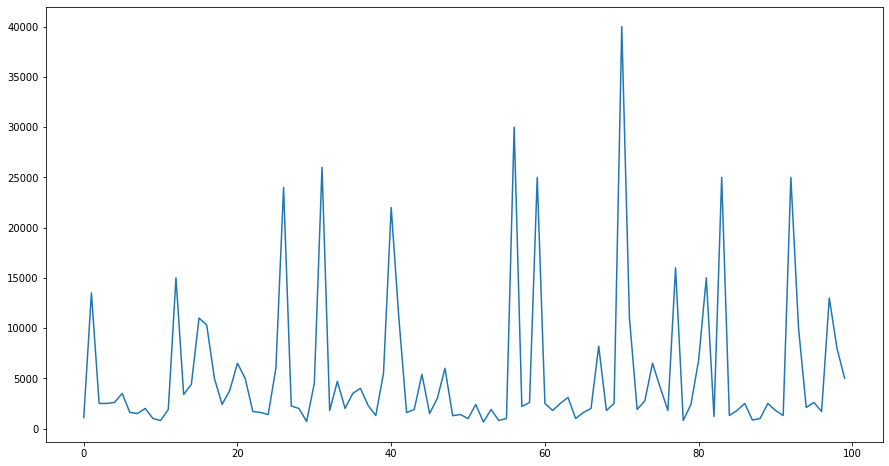

In [ ]:
g1.scatter(dados['Valor'], dados['Area'])
g1.set_title('Valor x Area')

g2.hist(dados['Valor'])
g2.set_title('Histograma')

dados_g3 = dados['Valor'].sample(100)
dados_g3.index = range(dados_g3.shape[0])  # Alinha o index para criar uma linha continua
plt.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

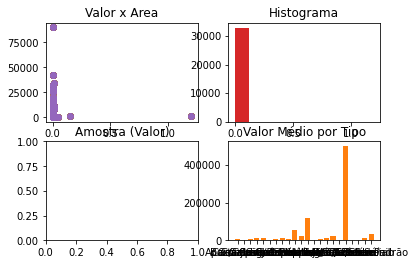

In [ ]:
area

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('/content/drive/MyDrive/Projetos/LEARNING/DADOS/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

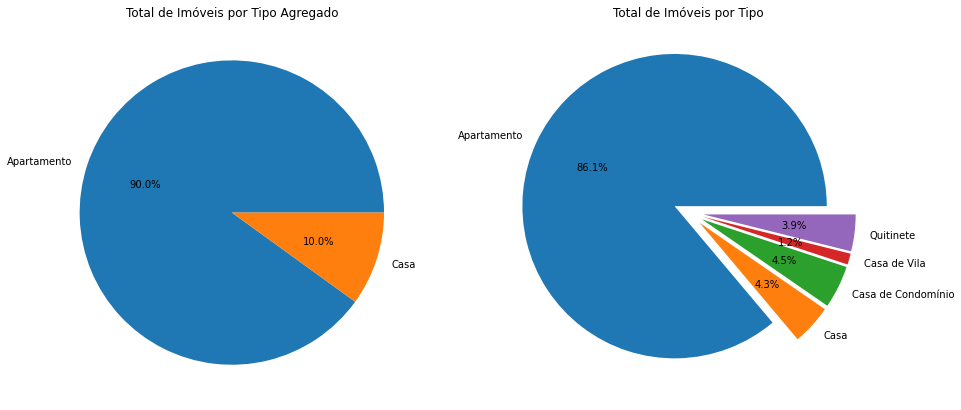

In [ ]:
# FIGURA
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

# FIG 1:
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, 
    labels = label, 
    autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

# FIG 2:
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, 
    labels = label, 
    autopct='%1.1f%%', 
    explode = (.1, .1, .1, .1, .1))  # EXPLODE as partes
g2.set_title('Total de Imóveis por Tipo')

## Multi-Indexing
 [Documentação](https://pandas.pydata.org/docs/user_guide/advanced.html#hierarchical-indexing-multiindex)

 * Como construir dataframes multiindex
 * Como consultar
 * Como realizar a ordenação dos elementos
 * Como realizar join
 * Como reduzir a simple-index